# **Defining the statistical model**

The next step is to specify the statistical model. 

$H(z)= H_0 \sqrt{\Omega_m (1+z)^3 +(1-\Omega_m)}$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
z=np.array([0.07  , 0.09  , 0.12  , 0.17  , 0.179 , 0.199 , 0.2   , 0.27  ,
       0.28  , 0.352 , 0.3802, 0.4   , 0.4004, 0.4247, 0.4497, 0.47  ,
       0.4783, 0.48  , 0.5929, 0.6797, 0.7812, 0.8754, 0.88  , 0.9   ,
       1.037 , 1.3   , 1.363 , 1.43  , 1.53  , 1.75  , 1.965 ]);


hz= np.array([ 69. ,  69. ,  68.6,  83. ,  75. ,  75. ,  72.9,  77. ,  88.8,
        83. ,  83. ,  95. ,  77. ,  87.1,  92.8,  89. ,  80.9,  97. ,
       104. ,  92. , 105. , 125. ,  90. , 117. , 154. , 168. , 160. ,
       177. , 140. , 202. , 186.5])

shz=np.array([19.6, 12. , 26.2,  8. ,  4. ,  5. , 29.6, 14. , 36.6, 14. , 13.5,
       17. , 10.2, 11.2, 12.9, 34. ,  9. , 62. , 13. ,  8. , 12. , 17. ,
       40. , 23. , 20. , 17. , 33.6, 18. , 14. , 40. , 50.4])


Write a code for $\chi^2$ minimization and calculating log likelihood

<ErrorbarContainer object of 3 artists>

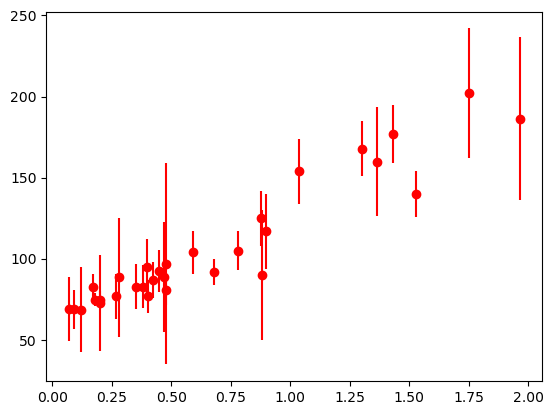

In [8]:
plt.errorbar(z, hz, yerr=shz, fmt='ro')

<ErrorbarContainer object of 3 artists>

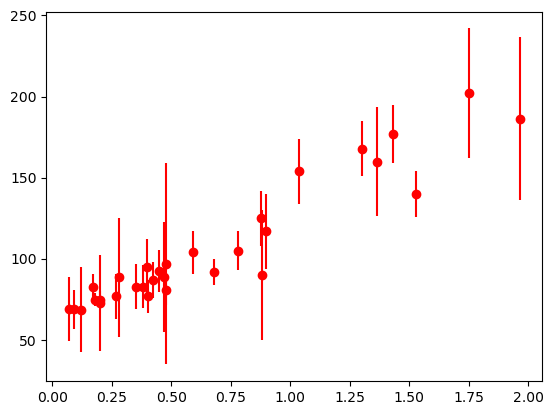

In [17]:
def friedmann_model(params, z):
    h0 = 70
    y = h0 * (((params[0] * ((1 + z) ** 3)) + (1 - params[0])) ** 1/2)
    return y
plt.errorbar(z, hz, yerr=shz, fmt='ro')

In [29]:
def get_chisq(params):
    model = friedmann_model(params, z)
    dY = hz - model
    chisq = np.sum((dY/shz) ** 2)
    return chisq

X^2: 326.70479298604704 | omega: 0.2
X^2: 314.70025043606086 | omega: 0.21000000000000002
X^2: 303.6230309469389 | omega: 0.22
X^2: 293.4731345186808 | omega: 0.23
X^2: 284.2505611512869 | omega: 0.24000000000000002
X^2: 275.95531084475704 | omega: 0.25
X^2: 268.5873835990912 | omega: 0.26
X^2: 262.1467794142895 | omega: 0.27
X^2: 256.63349829035167 | omega: 0.28
X^2: 252.04754022727806 | omega: 0.29000000000000004
X^2: 248.38890522506856 | omega: 0.30000000000000004
X^2: 245.65759328372306 | omega: 0.31
X^2: 243.85360440324172 | omega: 0.32
X^2: 242.97693858362442 | omega: 0.33
X^2: 243.02759582487116 | omega: 0.34
X^2: 244.00557612698188 | omega: 0.35
X^2: 245.91087948995678 | omega: 0.36
X^2: 248.74350591379573 | omega: 0.37
X^2: 252.50345539849883 | omega: 0.38
X^2: 257.19072794406594 | omega: 0.39
X^2: 262.805323550497 | omega: 0.4
X^2: 269.34724221779226 | omega: 0.41000000000000003
minimum:  242.97693858362442


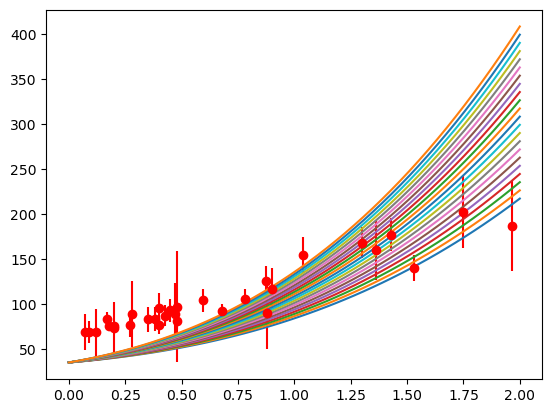

In [71]:
plt.errorbar(z, hz, yerr=shz, fmt='ro')
chisqs = []
for i in range(0, 22, 1): 
    omega = 0.2 + (i/100)
    modelx = np.linspace(0,2,50)
    modely = friedmann_model([omega], modelx)
    plt.plot(modelx, modely);
    chisq = get_chisq([omega])
    chisqs.append(chisq)
    print('X^2:',chisq, "| omega:", omega)
    
print("minimum: ", min(chisqs))
# plt.annotate(r"$\chi^2 = {:.2f}$".format(chisq), xy=(0, 1100), fontsize='12')

In [57]:
likelihood = np.exp(-chisq/2)
print("likelihood:", likelihood)

likelihood: 1.4182181158420374e-56
